In [1]:
import numpy as np
import pandas as pd

In [2]:
re_col='cool_ext_week'
length=28

In [3]:
cool_ext=pd.read_csv("/home/ruanlx/多任务学习/竞赛阶段5数据处理/"+re_col+".csv")

In [4]:
cool_ext.head()

,单据创建时间,重量,重量_1,重量_2,重量_3,重量_4,重量_5,重量_6,重量_7,重量_8,...,userfeature_996,userfeature_997,userfeature_998,userfeature_999,itemfeature_0,itemfeature_1,year,mon,mday,wday
0,2014-04-08,47.649,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.996368,2.829709,2014.0,4.0,8.0,1.0
1,2014-04-09,236.411,47.649,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.328491,3.772945,2014.0,4.0,9.0,2.0
2,2014-04-10,23.954,236.411,47.649,0.000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.332123,0.943236,2014.0,4.0,10.0,3.0
3,2014-04-11,60.529,23.954,236.411,47.649,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.664245,1.886472,2014.0,4.0,11.0,4.0
4,2014-04-12,71.323,60.529,23.954,236.411,47.649,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.328491,3.772945,2014.0,4.0,12.0,5.0


In [5]:
cool_ext=cool_ext.iloc[:,[0,1]+list(range(18,884))]

In [6]:
cool_ext.index=pd.DatetimeIndex(cool_ext['单据创建时间'])
cool_ext.drop('单据创建时间',axis=1,inplace=True)

In [7]:
ts1=cool_ext['重量'].reset_index()
ts1.columns=['ds','y']

ts1.head()

,ds,y
0,2014-04-08,47.649
1,2014-04-09,236.411
2,2014-04-10,23.954
3,2014-04-11,60.529
4,2014-04-12,71.323


In [8]:
ny = pd.DataFrame({'holiday': "chunjie", 'ds' : pd.to_datetime(['2016-2-7','2016-2-8', '2016-2-9',
                                                              '2016-2-10','2016-2-11',
                                                              '2016-2-12','2016-2-13',
                                                              '2016-2-14',
                                                              '2017-1-27','2017-1-28',
                                                              '2017-1-29','2017-1-30',
                                                              '2017-1-31','2017-2-1',
                                                              '2017-2-2','2017-2-3',
                                                              '2018-2-15','2018-2-16',
                                                              '2018-2-17','2018-2-18',
                                                              '2018-2-19','2018-2-20',
                                                              '2018-2-21','2018-2-22']),
                 'lower_window':-14,
                 'upper_window':14}) 
nw=pd.DataFrame({'holiday': "qingming", 'ds' : pd.to_datetime(['2018-4-5','2018-4-6',
                                                              '2018-4-7','2017-4-2',
                                                              '2017-4-3','2017-4-4',
                                                              '2016-4-2','2016-4-3',
                                                              '2016-4-4']),
                 'lower_window':-7,
                 'upper_window':7}) 
nd=pd.DataFrame({'holiday': "qingming", 'ds' : pd.to_datetime(['2016-4-30','2016-5-1',
                                                              '2016-5-2','2017-4-29',
                                                              '2017-4-30','2017-5-1',
                                                              '2018-4-29',
                                                              '2018-4-30','2018-5-1',]),
                 'lower_window':-7,
                 'upper_window':7}) 
dw=pd.DataFrame({'holiday': "duanwu", 'ds' : pd.to_datetime(['2016-6-9','2016-6-10',
                                                            '2016-6-11','2017-5-28',
                                                            '2017-5-29','2017-5-30',
                                                            '2018-6-17','2016-6-18',
                                                            '2018-6-19']),
                 'lower_window':-3,
                 'upper_window':3}) 
nn=pd.concat((ny,nw,nd))



from fbprophet import Prophet
import matplotlib.pyplot as plt
m = Prophet(holidays=nn)
m.fit(ts1)
future = m.make_future_dataframe(periods=length)
future.tail()
forecast = m.predict(future)
print(forecast)


forecast[forecast['chunjie'].abs()>0][['ds','chunjie']]

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


             ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2014-04-08    -28.265568  -1159.391593   3775.745446    -28.265568   
1    2014-04-09    -24.008190  -1012.675480   3793.593376    -24.008190   
2    2014-04-10    -19.750812  -1325.587817   3442.375284    -19.750812   
3    2014-04-11    -15.493434   -684.067697   3921.597194    -15.493434   
4    2014-04-12    -11.236056  -3011.539013   1830.011941    -11.236056   
5    2014-04-13     -6.978678  -4191.550033    695.431884     -6.978678   
6    2014-04-14     -2.721300  -1215.406889   3700.920776     -2.721300   
7    2014-04-15      1.536079  -1226.539178   3896.153491      1.536079   
8    2014-04-16      5.793457  -1060.224244   3831.124462      5.793457   
9    2014-04-17     10.050835  -1166.453965   3778.888938     10.050835   
10   2014-04-18     14.308213   -762.367738   4155.056703     14.308213   
11   2014-04-19     18.565591  -2925.513939   1953.055449     18.565591   
12   2014-04-20     22.82

,ds,chunjie
656,2016-01-24,-380.745065
657,2016-01-25,-972.167552
658,2016-01-26,-2133.676454
659,2016-01-27,757.259250
660,2016-01-28,604.526321
661,2016-01-29,-475.926188
662,2016-01-30,-2426.252258
663,2016-01-31,-1841.826220
664,2016-02-01,-4935.889616
665,2016-02-02,-3738.222153


In [14]:
chunjiexiaoying=(forecast[forecast['chunjie'].abs()>0][['ds','chunjie']])

In [24]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'chunjie', 'chunjie_lower', 'chunjie_upper', 'holidays',
       'holidays_lower', 'holidays_upper', 'qingming', 'qingming_lower',
       'qingming_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'yearly',
       'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

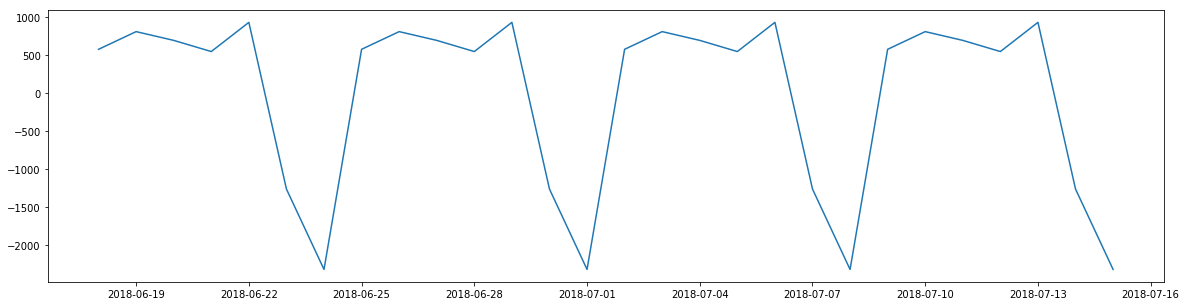

In [28]:
plt.figure(figsize=(20,5))
plt.plot(forecast['ds'][-28:],forecast['weekly'][-28:])

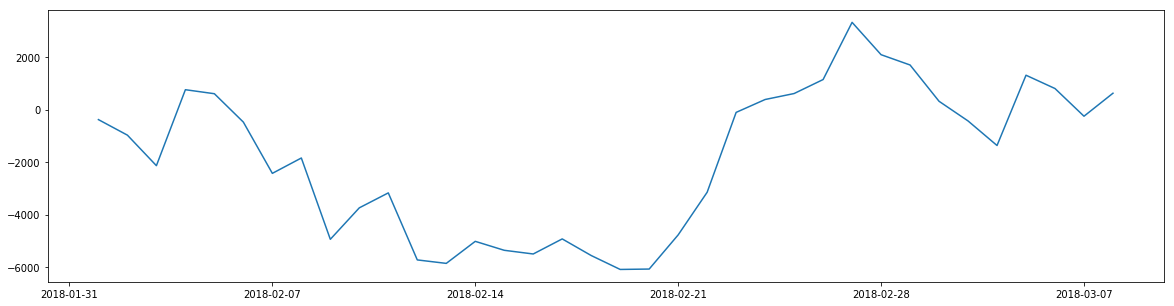

In [22]:
plt.figure(figsize=(20,5))
plt.plot(chunjiexiaoying[chunjiexiaoying['ds']>='2018']['ds'],chunjiexiaoying[chunjiexiaoying['ds']>='2018']['chunjie'])

In [48]:
forecast[forecast['qingming'].abs()>0][['ds','qingming']]

,ds,qingming
747,2016-03-26,-344.115597
748,2016-03-27,-500.329315
749,2016-03-28,-270.398270
750,2016-03-29,-342.796960
751,2016-03-30,358.151335
752,2016-03-31,2876.096776
753,2016-04-01,2233.932469
754,2016-04-02,-1150.094983
755,2016-04-03,-1840.085269
756,2016-04-04,-2200.169128


In [49]:
re=pd.DataFrame(forecast[['ds',"yhat"]][-length:])
re.columns=['单据创建时间',re_col]

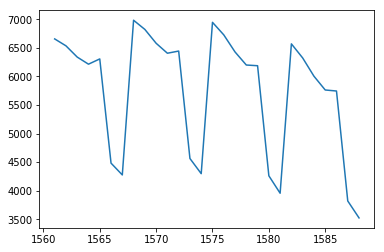

In [50]:
plt.plot(re[re_col])

In [51]:
re

,单据创建时间,hot_ext_week
1561,2018-06-18,6655.712857
1562,2018-06-19,6534.911905
1563,2018-06-20,6337.864973
1564,2018-06-21,6213.592468
1565,2018-06-22,6305.549429
1566,2018-06-23,4481.823473
1567,2018-06-24,4275.136480
1568,2018-06-25,6982.548582
1569,2018-06-26,6822.029101
1570,2018-06-27,6579.635998


In [52]:
re.to_csv('result_'+re_col+'.csv',encoding='utf-8')